In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from cycler import cycler

colors = cycler(color=plt.get_cmap("tab10").colors)

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (25, 5)
plt.rcParams["font.size"] = 12
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "gray"
plt.rcParams["axes.prop_cycle"] = colors
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["xtick.color"] = "black"
plt.rcParams["ytick.color"] = "black"
plt.rcParams["figure.titlesize"] = 25
plt.rcParams["figure.dpi"] = 100
plt.rcParams["agg.path.chunksize"] = 10000


os.chdir('/kaggle/input/offshore-ship-construction/1')


In [ ]:
# Listing all CSV files in the directory.

csv_files = [f for f in os.listdir() if f.endswith('.csv')]
csv_files

['mmsi=413021250.csv',
 'mmsi=413233050.csv',
 'mmsi=413290310.csv',
 'mmsi=412054640.csv',
 'mmsi=414511000.csv',
 'mmsi=413305970.csv',
 'mmsi=413358760.csv',
 'mmsi=413369420.csv',
 'mmsi=413462670.csv',
 'mmsi=412272110.csv',
 'mmsi=413233660.csv',
 'mmsi=413288850.csv',
 'mmsi=413244220.csv',
 'mmsi=414402540.csv',
 'mmsi=413282010.csv',
 'mmsi=413235940.csv',
 'mmsi=413290630.csv',
 'mmsi=411155777.csv',
 'mmsi=413556050.csv',
 'mmsi=414351180.csv',
 'mmsi=413256670.csv',
 'mmsi=413223840.csv',
 'mmsi=413282730.csv',
 'mmsi=413289430.csv',
 'mmsi=413306040.csv',
 'mmsi=413292870.csv',
 'mmsi=413465470.csv',
 'mmsi=413304590.csv',
 'mmsi=412046080.csv',
 'mmsi=412362440.csv',
 'mmsi=412361930.csv',
 'mmsi=413230990.csv',
 'mmsi=413226680.csv',
 'mmsi=413556030.csv',
 'mmsi=412471650.csv',
 'mmsi=413043250.csv',
 'mmsi=413556890.csv',
 'mmsi=413706470.csv',
 'mmsi=413364580.csv',
 'mmsi=413480020.csv',
 'mmsi=413380620.csv',
 'mmsi=413267010.csv',
 'mmsi=412356230.csv',
 'mmsi=4139

In [ ]:
dfs = []

for csv in csv_files:
    dfs.append(pd.read_csv(csv))

# Concatenating all the DataFrames in the list into a single DataFrame.

final_df = pd.concat(dfs, ignore_index=True)
usecols=(['Name','family','latitude','longitude'])
final_df

/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp/ipykernel_13/1905524658.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(csv))
/tmp

,rot,classtype,postime,lon,lat,course,heading,speed,navigationstatus,accuracy,receivetime,month_id,day_id,X,Y
0,NaN,A,1586962524,68330157,13484542,0,511.0,0,NaN,1.0,1587026575,202004,20200415,113.883595,22.474237
1,NaN,A,1586952591,68330151,13484566,0,511.0,0,NaN,1.0,1587018163,202004,20200415,113.883585,22.474277
2,NaN,A,1586956995,68330140,13484595,0,511.0,0,NaN,1.0,1587021910,202004,20200415,113.883567,22.474325
3,NaN,A,1586964936,68330158,13484536,0,511.0,0,NaN,1.0,1587028146,202004,20200415,113.883597,22.474227
4,NaN,A,1586964715,68330164,13484536,0,511.0,0,NaN,1.0,1587028015,202004,20200415,113.883607,22.474227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38120129,0.0,NaN,1640964179,71929773,15366326,3059,108.0,0,0.0,NaN,1640964250,202112,20211231,119.882955,25.610543
38120130,0.0,NaN,1640939657,71929777,15366364,250,108.0,2,0.0,NaN,1640939715,202112,20211231,119.882962,25.610607
38120131,0.0,NaN,1640914119,71929809,15366379,1340,108.0,3,NaN,0.0,1640914151,202112,20211231,119.883015,25.610632
38120132,0.0,NaN,1640883597,71929798,15366406,1731,108.0,1,0.0,NaN,1640883611,202112,20211231,119.882997,25.610677


In [ ]:
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

In [ ]:
os.chdir('/kaggle/input/offshore-ship-construction/1')
os.getcwd()

'/kaggle/input/offshore-ship-construction/1'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

final_df.columns


Index(['rot', 'classtype', 'postime', 'lon', 'lat', 'course', 'heading',
       'speed', 'navigationstatus', 'accuracy', 'receivetime', 'month_id',
       'day_id', 'X', 'Y'],
      dtype='object')

In [ ]:
final_df.shape

(38120134, 15)

In [ ]:
import pandas as pd
import folium


# Convert the necessary columns to appropriate data types
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
final_df['lon'] = final_df['lon'].astype(float) / 1000000
final_df['lat'] = final_df['lat'].astype(float) / 1000000

# Group the data by the unique combination of 'classtype' and 'month_id'
grouped = final_df.groupby(['classtype', 'month_id'])

# Create a Folium map
m = folium.Map(location=[final_df['lat'].mean(), final_df['lon'].mean()], zoom_start=10)

# Add ship trajectories to the map
for (classtype, month), group in grouped:
    coordinates = [(row['lat'], row['lon']) for _, row in group.sort_values('postime').iterrows()]
    folium.PolyLine(locations=coordinates, color='red', weight=2.5, opacity=0.8).add_to(m)

# Display the map
print(m)

<Axes: >

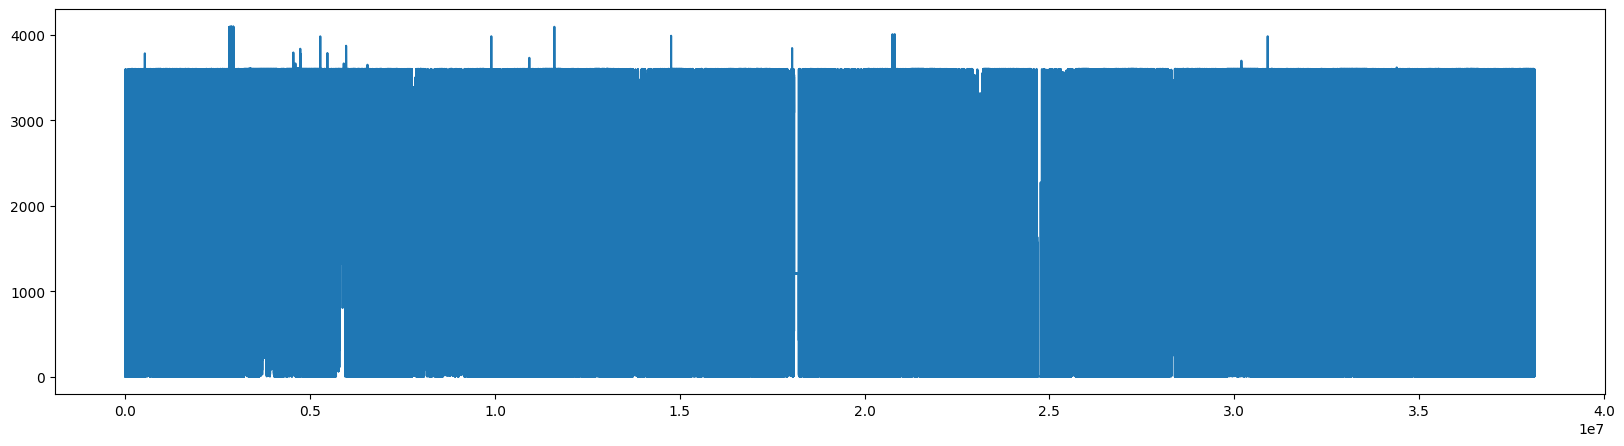

In [ ]:
final_df['course'].plot(figsize=(20, 5))

In [ ]:
import logging
import time

import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
from matplotlib.collections import LineCollection
from networkx.exception import NetworkXPointlessConcept
from pandas.api.types import is_datetime64_any_dtype

from trackintel.geogr import check_gdf_planar, meters_to_decimal_degrees

final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')


def a4_figsize(fig_height_mm=None, columns=2):
    """Generate sizes for a figure that fits on an A4 page.

    The sizes are taken from:
    http://www.springer.com/computer/journal/450 > Artwork and Illustrations Guidelines > Figure Placement and Size

    Parameters
    ----------
    fig_height_mm : float
        If set, uses this height for the figure. Otherwise computes one based on an aesthetic ratio.

    columns : float
        The number of columns this figure should span (1, 1.5 or 2).

    Returns
    -------
    (float, float)
        The width and height in which to plot a figure to fit on an A4 sheet.

    Examples
    --------
    >>> ti.visualization.util.a4_figsize(columns=4)
    """
    if columns == 1:
        fig_width_mm = 84.0
    elif columns == 1.5:
        fig_width_mm = 129.0
    elif columns == 2.0:
        fig_width_mm = 174.0
    else:
        raise ValueError

    if fig_height_mm is None:
        golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio.
        fig_height_mm = fig_width_mm * golden_mean

    max_figh_height_mm = 234.0
    if fig_height_mm > max_figh_height_mm:
        logging.warning(f"fig_height too large: {fig_height_mm}, so will reduce to {max_figh_height_mm}.")
        fig_height_mm = max_figh_height_mm

    inch = 1 / 25.4  # millimeter in inches

    logging.info(f"Creating figure of {fig_width_mm}x{fig_height_mm}.")
    return fig_width_mm * inch, fig_height_mm * inch


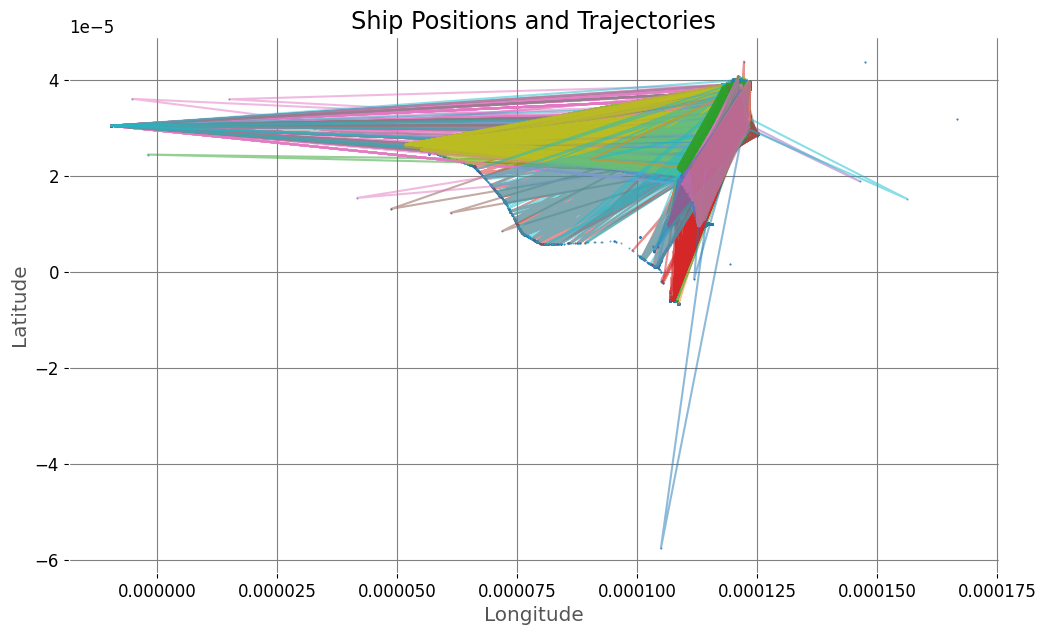

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from trackintel.geogr import meters_to_decimal_degrees

# Convert the necessary columns to appropriate data types
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
final_df['X'] = final_df['X'].astype(float)
final_df['Y'] = final_df['Y'].astype(float)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the ship positions
ax.scatter(final_df['X'], final_df['Y'], s=1, alpha=0.5, label='Ship Positions')

# Group the data by the unique combination of 'classtype' and 'month_id'
grouped = final_df.groupby(['classtype', 'month_id'])

# Plot the ship trajectories
for (classtype, month), group in grouped:
    group = group.sort_values('postime')
    ax.plot(group['X'], group['Y'], label=f'Classtype: {classtype}, Month: {month}', alpha=0.5)

# Set the plot title and axis labels
ax.set_title('Ship Positions and Trajectories')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Adjust the aspect ratio to preserve the data's aspect ratio
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [ ]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 40.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import trackintel as ti
from trackintel.geogr import check_gdf_planar, meters_to_decimal_degrees

def plot_ship_tracks(data_path, filename=None, plot_osm=False, ax=None):
    """
    Plots ship positions and trajectories on a map (optionally to a file).

    Parameters
    ----------
    data_path : str
        Path to the CSV file containing the ship data.
    filename : str, optional
        The file to plot to, else if ax is None, the plot will be shown.
    plot_osm : bool, optional
        If True, will download OSM street network and plot it as a base map.
        If True, depending on the extent of your data, this might take a long time!
    ax : matplotlib.pyplot.Artist, optional
        Axis on which to draw the plot.

    Examples
    --------
    >>> plot_ship_tracks('file 1 of 110.csv', filename="output.png", plot_osm=True)
    """
    has_no_ax_input = ax is None
    if ax is None:
        _, ax = regular_figure()


    # Convert the necessary columns to appropriate data types
    final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
    final_df['lon'] = final_df['lon'].astype(float) / 1000000
    final_df['lat'] = final_df['lat'].astype(float) / 1000000

    # Create a GeoDataFrame from the DataFrame
    gdf = gpd.GeoDataFrame(final_df, geometry=gpd.points_from_xy(final_df['lon'], df['lat']), crs='EPSG:4326')

    # Prepare the GeoDataFrame for plotting
    positionfixes, _, _, _ = _prepare_frames(gdf, None, None, None)

    if plot_osm:
        north, south, east, west = _calculate_bounds(positionfixes, None, None, None)
        plot_osm_streets(north, south, east, west, ax=ax)
        ax.set_xlim([west, east])
        ax.set_ylim([south, north])

    _plot_frames(positionfixes, None, None, None, radius_sp=100, radius_locs=150, ax=ax)

    ax.set_aspect("equal", adjustable="box")
    plt.show()

In [ ]:
 usecols=pd.DataFrame(['Name','family','latitude','longitude'])

In [ ]:
import seaborn as sns

from mpl_toolkits.basemap import Basemap

for dirname, _, filenames in os.walk('/kaggle/input/offshore-ship-construction/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def get_region(data,bot_lat, left_lon, top_lat, right_lon):
    '''Gets the data within the region givenby the corner latitude and longitude.
    data = Dataframe from where the regional data has to be taken.
    reg = (Lower Latitude, Left Longitude, Top Latitude, Right Longitude)
    '''
    top = data.X <= top_lat
    bot = data.Y >= bot_lat
    left = data.X >= left_lon
    right = data.Y <= right_lon

    index = top&bot&left&right
    return final_df[index]


india_lang = get_region(final_df,5,60,40,100)
india_lang

/kaggle/input/offshore-ship-construction/1/mmsi=413021250.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413233050.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413290310.csv
/kaggle/input/offshore-ship-construction/1/mmsi=412054640.csv
/kaggle/input/offshore-ship-construction/1/mmsi=414511000.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413305970.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413358760.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413369420.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413462670.csv
/kaggle/input/offshore-ship-construction/1/mmsi=412272110.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413233660.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413288850.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413244220.csv
/kaggle/input/offshore-ship-construction/1/mmsi=414402540.csv
/kaggle/input/offshore-ship-construction/1/mmsi=413282010.csv
/kaggle/input/offshore-ship-construction/1/schema.ini
/kaggle/input/of

,rot,classtype,postime,lon,lat,course,heading,speed,navigationstatus,accuracy,receivetime,month_id,day_id,X,Y


In [ ]:
#The trajectory of each boat
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
from folium.plugins import PolyLineTextPath

# Read the data from the CSV file

# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Create a GeoDataFrame from the data
geometry = gpd.points_from_xy(final_df['lon'], final_df['lat'])
gdf = gpd.GeoDataFrame(final_df, geometry=geometry)

# Group the data by ship ID ('rot')
ship_dataf = dict(tuple(gdf.groupby('course')))

# Create the map and add the tracks
m = folium.Map(location=[final_df['lat'].mean(), final_df['lon'].mean()], zoom_start=10)

# Add the tracks to the map
for ship_id, ship_df in ship_dataf.items():
    # Create a GeoDataFrame for the ship's track
    ship_track = gpd.GeoDataFrame(ship_df, geometry=ship_df.geometry)

    # Add the ship's track to the map

    # Add the ship ID as a label on the track
    plugins.PolyLineTextPath(
        ship_track.geometry,
        text=f'Ship {ship_id}',
        repeat=True,
        offset=0.0001,
        color='white',
        font='arial',
        size='smaller',
        weight='bold'
    ).add_to(m)

print(ship_track)

         rot classtype             postime       lon       lat  course  \
2869169  NaN         A 2020-07-28 12:35:15  68121838  13305153    4095   
2869173  NaN         A 2020-07-28 00:25:54  68121829  13305165    4095   
2869176  NaN         A 2020-07-28 07:28:25  68121844  13305172    4095   
2869177  NaN         A 2020-07-28 04:22:06  68121831  13305162    4095   
2869178  NaN         A 2020-07-28 07:40:35  68121829  13305166    4095   
...      ...       ...                 ...       ...       ...     ...   
2919633  NaN         A 2021-07-28 20:05:32  70531305  14247906    4095   
2919641  NaN         A 2021-07-28 19:05:26  70531164  14247793    4095   
2919649  NaN         A 2021-07-28 19:00:37  70531275  14247895    4095   
2919652  NaN         A 2021-07-28 20:46:49  70531309  14247912    4095   
2919660  NaN         A 2021-07-28 16:20:31  70531306  14247913    4095   

         heading  speed  navigationstatus  accuracy  receivetime  month_id  \
2869169    511.0      0          

In [ ]:
import plotly.express as px
import plotly.graph_objects as go



fig = px.scatter_mapbox(final_df,
                       lat = 'X',
                       lon = 'Y',
                       zoom = 8,
                       color = 'lat',
                       width = 900,
                       height = 600,
                       title = 'Ship Trajectory',
                       center=dict(lat=45.5, lon=-73.6), mapbox_style="carto-positron")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":10})


fig.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
mapbox_access_token = open("/kaggle/input/offshore-ship-construction/1/mmsi=112187866.csv").read()


site_lat = final_df.X
site_lon = final_df.Y
locations_name = final_df.postime

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ))

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='none'
    ))

fig.update_layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)

fig.show()

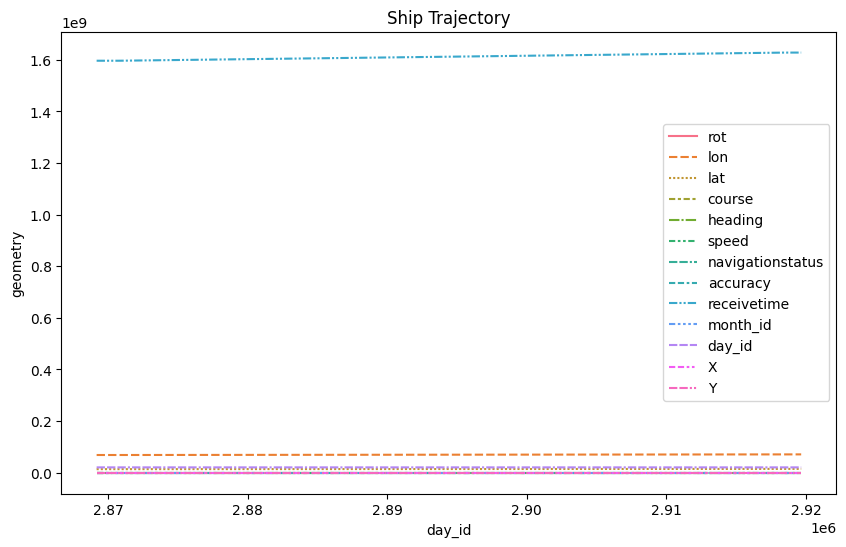

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot the ship trajectory
plt.figure(figsize=(10, 6))
sns.lineplot(ship_track)
plt.xlabel('day_id')
plt.ylabel('geometry')
plt.title('Ship Trajectory')
plt.show()

In [ ]:
#ships entering the construction area and their coordinates
# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Create a GeoDataFrame from the data
geometry = gpd.points_from_xy(final_df['lon'], final_df['lat'])
gdf = gpd.GeoDataFrame(final_df, geometry=geometry)

# Define the construction site coordinates (replace with your actual coordinates)
construction_site_lat = 34.454085
construction_site_lon = 119.7946117

# Define the radius (in meters) to consider a ship within the construction site
work_radius = 500  # Adjust this value as needed

# Calculate the distance between each ship's location and the construction site
gdf['distance_to_site'] = ((gdf['lat'] - construction_site_lat) ** 2 + (gdf['lon'] - construction_site_lon) ** 2) ** 0.5

# Convert distance from degrees to meters
gdf['distance_to_site'] = gdf['distance_to_site'] * 111139  # Approximate conversion factor

# Group the data by ship ID ('rot')
ship_datar = dict(tuple(gdf.groupby('rot')))

# Create the map and add the tracks
m = folium.Map(location=[final_df['lat'].mean(), final_df['lon'].mean()], zoom_start=10)

# Add the tracks to the map
for ship_id, ship_df in ship_datar.items():
    # Create a GeoDataFrame for the ship's track
    ship_constr = gpd.GeoDataFrame(ship_df, geometry=ship_df.geometry)

    # Add the ship's track to the map

    # Add the ship ID as a label on the track
    plugins.PolyLineTextPath(
        ship_constr.geometry,
        text=f'Ship {ship_id}',
        repeat=True,
        offset=0.0001,
        color='white',
        font='arial',
        size='smaller',
        weight='bold'
    ).add_to(m)

    # Check if the ship entered the construction area
    if any(ship_df['distance_to_site'] <= work_radius):
        print(f"Ship {ship_id} entered the construction area at coordinates: {ship_df[ship_df['distance_to_site'] <= work_radius][['lat', 'lon']].iloc[0]}")

print(ship_constr)

                   rot classtype             postime       lon       lat  \
1780969   4.294967e+09       NaN 2019-08-14 15:23:37  72401104  20535420   
1780997   4.294967e+09       NaN 2019-08-14 14:18:40  72401104  20535427   
1781045   4.294967e+09       NaN 2019-08-14 12:41:30  72401104  20535420   
1781104   4.294967e+09       NaN 2019-08-14 15:23:33  72401104  20535420   
1781125   4.294967e+09       NaN 2019-08-14 14:18:34  72401104  20535427   
...                ...       ...                 ...       ...       ...   
20947429  4.294967e+09       NaN 2019-08-17 19:21:34  72910567  19904874   
20947481  4.294967e+09       NaN 2019-08-17 16:39:31  72902302  19905217   
20947494  4.294967e+09       NaN 2019-08-17 17:18:38  72901524  19906369   
20947527  4.294967e+09       NaN 2019-08-17 18:27:39  72908044  19902771   
20949595  4.294967e+09       NaN 2019-08-29 03:55:34  72898269  19897662   

          course  heading  speed  navigationstatus  accuracy  receivetime  \
1780969   

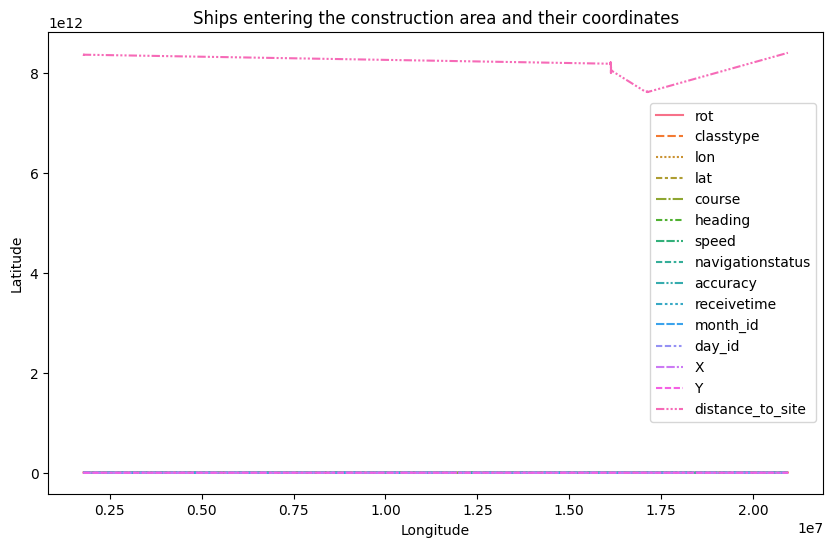

In [ ]:
# Plot the ships entering the construction area and their coordinates
plt.figure(figsize=(10, 6))
sns.lineplot(ship_constr)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ships entering the construction area and their coordinates')
plt.show()

In [ ]:
#Speed ship analysis data
# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Define the speed categories
speed_categories = ['< 5 knots', '5-25 knots', '> 25 knots']
speed_bins = [0, 5, 25, float('inf')]

# Categorize the speed
final_df['speed_category'] = pd.cut(final_df['speed'], bins=speed_bins, labels=speed_categories)

# Calculate the total count and percentage for each speed category
speed_counts = final_df['speed_category'].value_counts()
speed_percentages = (speed_counts / len(final_df)) * 100

# Print the speed analysis results
print("Ship Speed Analysis")
print("-" * 20)
print("Speed Category\tCount\tPercentage")
for category, count in speed_counts.items():
    percentage = speed_percentages[category]
    print(f"{category}\t{count}\t{percentage:.2f}%")

Ship Speed Analysis
--------------------
Speed Category	Count	Percentage
< 5 knots	9478202	24.86%
> 25 knots	4138017	10.86%
5-25 knots	994414	2.61%


In [ ]:
# Defining the Location
# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Create a GeoDataFrame from the data
geometry = gpd.points_from_xy(final_df['lon'], final_df['lat'])
gdf = gpd.GeoDataFrame(final_df, geometry=geometry)

# Define the location boundaries
min_lat = final_df['lat'].min()
max_lat = final_df['lat'].max()
min_lon = final_df['lon'].min()
max_lon = final_df['lon'].max()


print(geometry)

<GeometryArray>
[<POINT (68330157 13484542)>, <POINT (68330151 13484566)>,
 <POINT (68330140 13484595)>, <POINT (68330158 13484536)>,
 <POINT (68330164 13484536)>, <POINT (68330149 13484575)>,
 <POINT (68330139 13484554)>, <POINT (68330173 13484559)>,
 <POINT (68330149 13484554)>, <POINT (68330128 13484560)>,
 ...
 <POINT (71929765 15366339)>, <POINT (71929786 15366346)>,
 <POINT (71929798 15366331)>, <POINT (71929768 15366345)>,
 <POINT (71929768 15366373)>, <POINT (71929773 15366326)>,
 <POINT (71929777 15366364)>, <POINT (71929809 15366379)>,
 <POINT (71929798 15366406)>, <POINT (71929774 15366361)>]
Length: 38120134, dtype: geometry


Ship Speed Analysis
--------------------
Speed Category	Count	Percentage
Low Speed (< 1 knot)	9889954	25.94%
Medium Speed (1-10 knots)	4499046	11.80%
High Speed (> 10 knots)	221633	0.58%


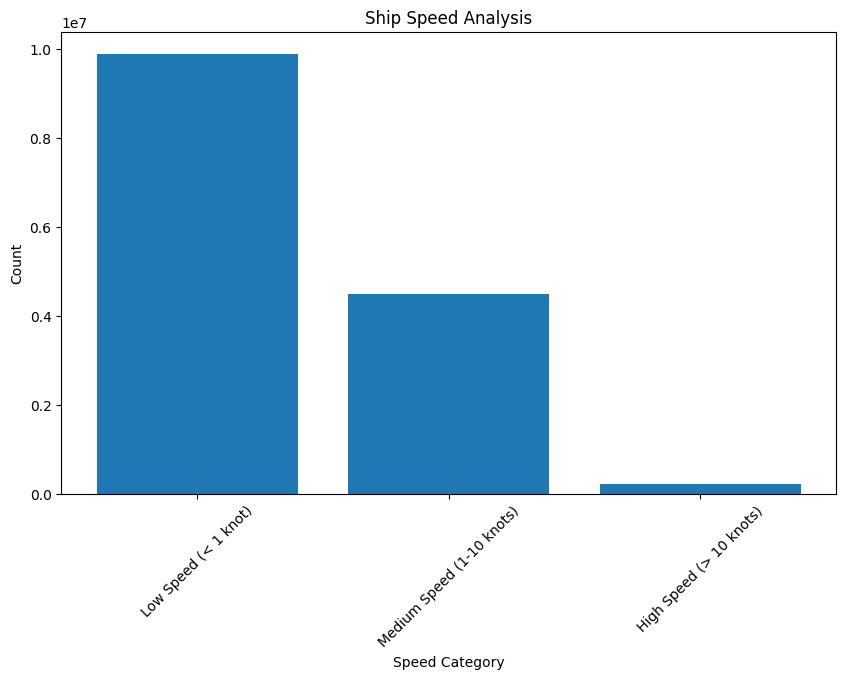

In [ ]:

# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Calculate the real speed in knots
final_df['speed_knots'] = final_df['speed'] / 10

# Define the speed categories
speed_categories = ['Low Speed (< 1 knot)', 'Medium Speed (1-10 knots)', 'High Speed (> 10 knots)']
speed_bins = [0, 1, 10, float('inf')]

# Categorize the speed
final_df['speed_category'] = pd.cut(final_df['speed_knots'], bins=speed_bins, labels=speed_categories)

# Calculate the total count and percentage for each speed category
speed_counts = final_df['speed_category'].value_counts()
speed_percentages = (speed_counts / len(final_df)) * 100

# Print the speed analysis results
print("Ship Speed Analysis")
print("-" * 20)
print("Speed Category\tCount\tPercentage")
for category, count in speed_counts.items():
    percentage = speed_percentages[category]
    print(f"{category}\t{count}\t{percentage:.2f}%")

# Plot the speed category counts
plt.figure(figsize=(10, 6))
plt.bar(speed_counts.index, speed_counts.values)
plt.xlabel('Speed Category')
plt.ylabel('Count')
plt.title('Ship Speed Analysis')
plt.xticks(rotation=45)
plt.show()

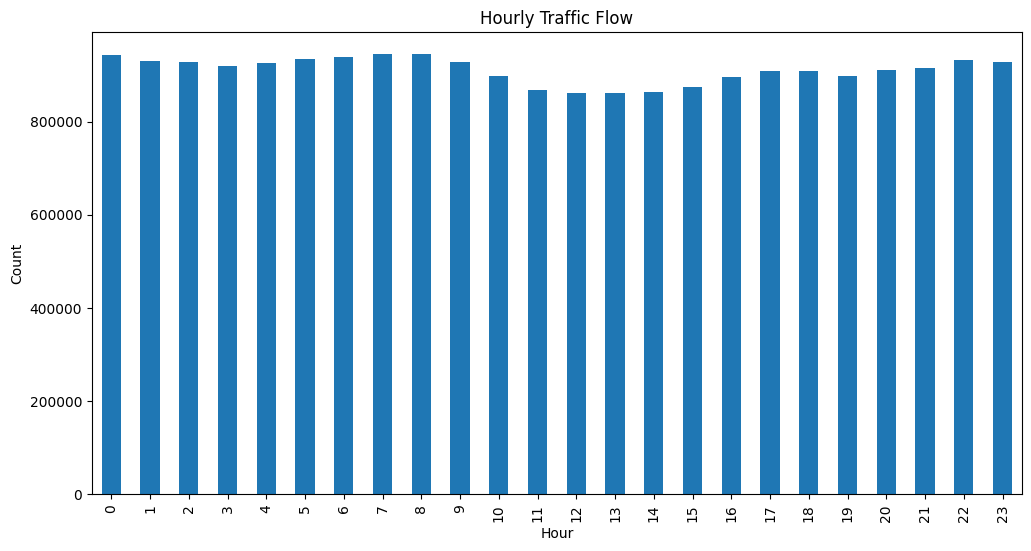

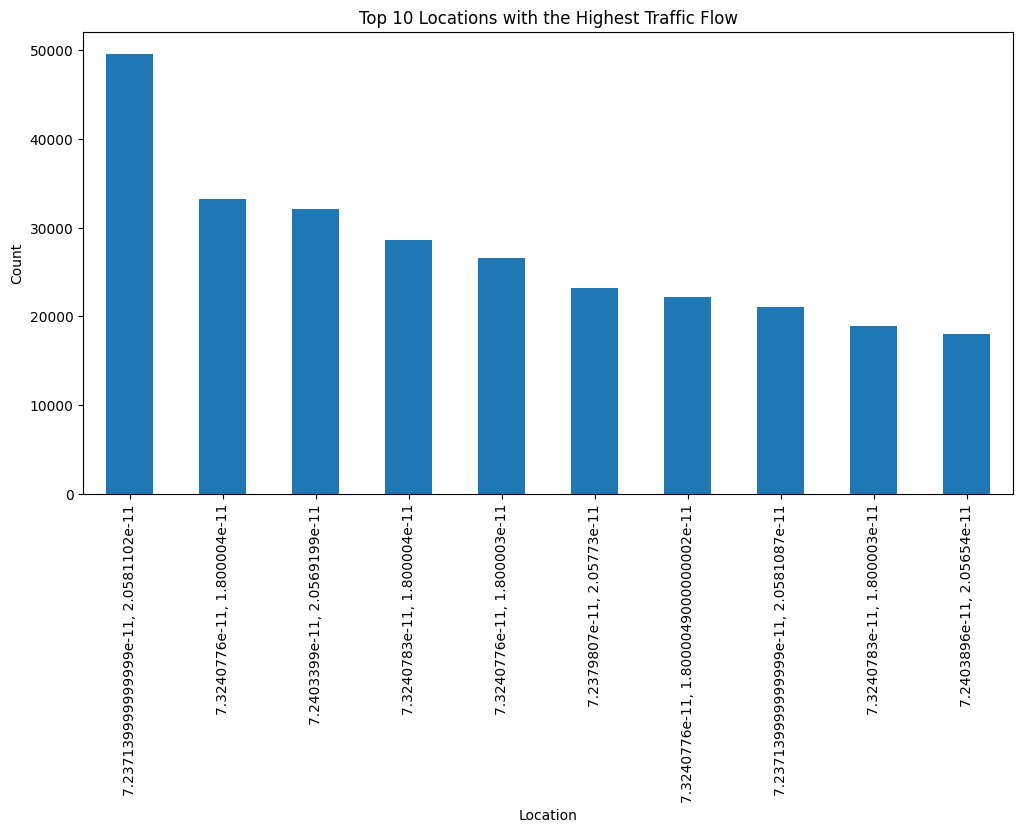

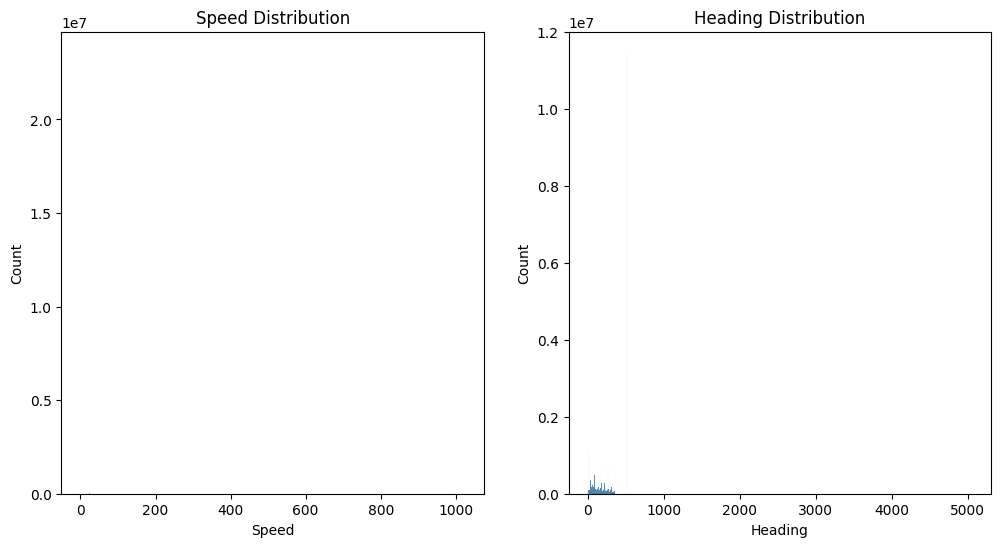

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Convert the necessary columns to appropriate data types
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
final_df['lon'] = final_df['lon'].astype(float) / 1000000
final_df['lat'] = final_df['lat'].astype(float) / 1000000
final_df['course'] = final_df['course'].astype(float)
final_df['heading'] = final_df['heading'].astype(float)
final_df['speed'] = final_df['speed'].astype(float)

# Analyze the traffic flow over time
final_df['hour'] = final_df['postime'].dt.hour
final_df['minute'] = final_df['postime'].dt.minute
final_df['time'] = final_df['postime'].dt.strftime('%H:%M')

hourly_traffic = final_df.groupby('hour')['classtype'].count()
fig, ax = plt.subplots(figsize=(12, 6))
hourly_traffic.plot(kind='bar', ax=ax)
ax.set_title('Hourly Traffic Flow')
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
plt.show()

# Analyze the traffic flow by location
final_df['location'] = final_df['lon'].astype(str) + ', ' + final_df['lat'].astype(str)
location_traffic = final_df.groupby('location')['classtype'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
location_traffic.head(10).plot(kind='bar', ax=ax)
ax.set_title('Top 10 Locations with the Highest Traffic Flow')
ax.set_xlabel('Location')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Analyze the traffic flow by speed and heading
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Speed distribution
sns.histplot(final_df['speed'], ax=ax1)
ax1.set_title('Speed Distribution')
ax1.set_xlabel('Speed')
ax1.set_ylabel('Count')

# Heading distribution
sns.histplot(final_df['heading'], ax=ax2)
ax2.set_title('Heading Distribution')
ax2.set_xlabel('Heading')
ax2.set_ylabel('Count')

plt.show()

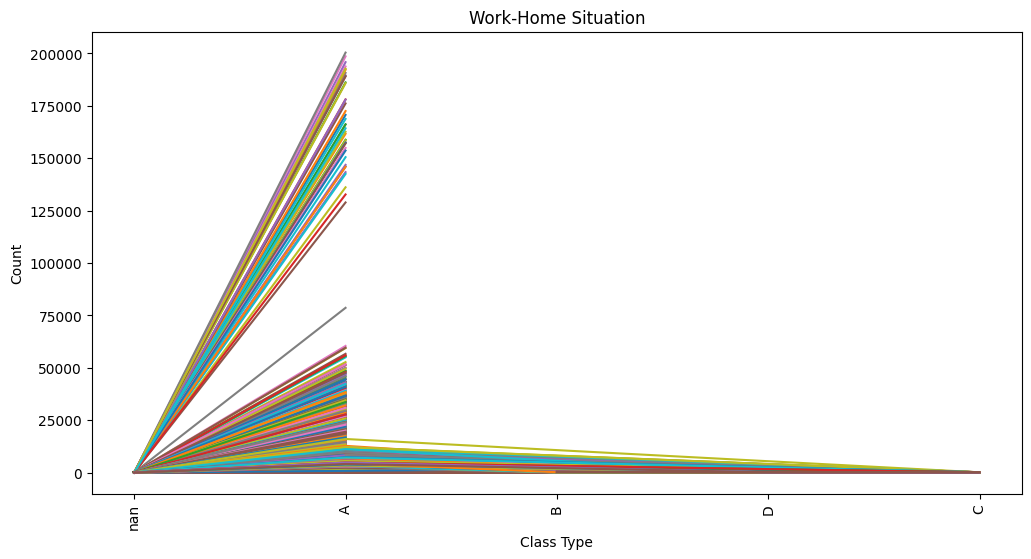

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by month and day
grouped = final_df.groupby(['month_id', 'day_id'])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each month and day
for (month, day), group in grouped:
    # Extract the unique values for 'classtype'
    unique_classtypes = group['classtype'].unique()

    # Calculate the count of each 'classtype'
    classtype_counts = [group[group['classtype'] == ct].shape[0] for ct in unique_classtypes]

    # Convert 'classtype' to strings to ensure compatibility with the 'bar' function
    unique_classtypes = [str(ct) for ct in unique_classtypes]

    # Create a bar plot for the current month and day
    ax.plot(unique_classtypes, classtype_counts, label=f'Month {month}, Day {day}')

# Set the plot title and axis labels
ax.set_title('Work-Home Situation')
ax.set_xlabel('Class Type')
ax.set_ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)


# Show the plot
plt.show()

In [ ]:
# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Define a function to classify the ship's status
def classify_status(row):
    # Define the criteria for "home" and "work" based on the available columns
    # For example, you could use speed, location, or other relevant factors
    if row['speed'] < 5:  # Assuming low speed means "home"
        return 'home'
    else:
        return 'work'

# Apply the classification function to the data
final_df['status'] = final_df.apply(classify_status, axis=1)

# Calculate the average fraction of "home" and "work" for each day
daily_fractions = final_df.groupby([final_df['postime'].dt.date, 'status']).size().unstack('status', fill_value=0)
daily_fractions = daily_fractions.div(daily_fractions.sum(axis=1), axis=0)

# Calculate the average fraction of "home" and "work" for each month
monthly_fractions = final_df.groupby([final_df['postime'].dt.month, final_df['postime'].dt.year, 'status']).size().unstack('status', fill_value=0)
monthly_fractions = monthly_fractions.div(monthly_fractions.sum(axis=1), axis=0)

# Calculate the average fraction of "home" and "work" for each quarter
quarterly_fractions = final_df.groupby([pd.PeriodIndex(final_df['postime'], freq='Q'), 'status']).size().unstack('status', fill_value=0)
quarterly_fractions = quarterly_fractions.div(quarterly_fractions.sum(axis=1), axis=0)

# Print the results
print("Daily Average Fractions:")
print(daily_fractions)
print("\nMonthly Average Fractions:")
print(monthly_fractions)
print("\nQuarterly Average Fractions:")
print(quarterly_fractions)

/tmp/ipykernel_13/1138786982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
/tmp/ipykernel_13/1138786982.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['status'] = final_df.apply(classify_status, axis=1)


Daily Average Fractions:
status          home      work
postime                       
2018-12-31  0.946289  0.053711
2019-01-01  0.908008  0.091992
2019-01-02  0.857705  0.142295
2019-01-03  0.842400  0.157600
2019-01-04  0.909009  0.090991
...              ...       ...
2021-12-27  0.892098  0.107902
2021-12-28  0.813702  0.186298
2021-12-29  0.961905  0.038095
2021-12-30  0.925139  0.074861
2021-12-31  0.911583  0.088417

[1097 rows x 2 columns]

Monthly Average Fractions:
status               home      work
postime postime                    
1       2019     0.943576  0.056424
        2020     0.955894  0.044106
        2021     0.960176  0.039824
2       2019     0.967440  0.032560
        2020     0.982664  0.017336
        2021     0.962602  0.037398
3       2019     0.962297  0.037703
        2020     0.955725  0.044275
        2021     0.948404  0.051596
4       2019     0.968980  0.031020
        2020     0.971351  0.028649
        2021     0.951219  0.048781
5       2019   

In [ ]:
import numpy as np

# Convert the postime column to datetime
final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')

# Define the construction site coordinates (replace with your actual coordinates)
construction_site_lat = 34.454085
construction_site_lon = 119.7946117

# Define the radius (in meters) to consider a ship within the construction site
radius = 500  # Adjust this value as needed

# Calculate the distance between each ship's location and the construction site
final_df['distance_to_site'] = np.sqrt((final_df['lat'] - construction_site_lat) ** 2 +
                                   (final_df['lon'] - construction_site_lon) ** 2)

# Convert distance from degrees to meters
final_df['distance_to_site'] = final_df['distance_to_site'] * 111139  # Approximate conversion factor

# Filter ships within the construction site radius for a certain duration
construction_ships = final_df[final_df['distance_to_site'] <= radius].groupby('rot')['rot'].count()
construction_ships = construction_ships[construction_ships > 100]  # Adjust the duration threshold as needed

# Print the construction ship IDs
print("Construction Ship IDs:")
print(construction_ships.index.tolist())

/tmp/ipykernel_13/3302755338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['postime'] = pd.to_datetime(final_df['postime'], unit='s')
/tmp/ipykernel_13/3302755338.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['distance_to_site'] = np.sqrt((final_df['lat'] - construction_site_lat) ** 2 +
/tmp/ipykernel_13/3302755338.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

Construction Ship IDs:
[]
